BUILDING THE MODELS


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sb


In [ ]:
df = pd.read_csv('/content/calories_data.csv')
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


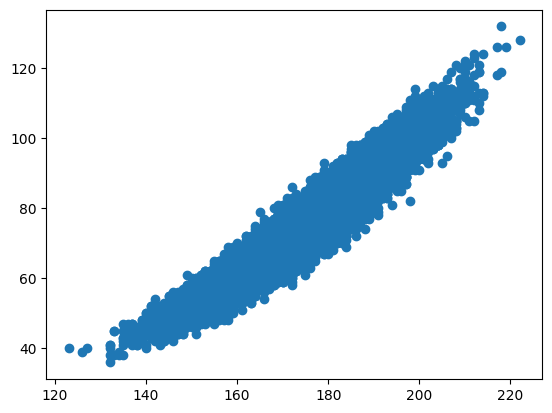

In [ ]:
plt.scatter(df['Height'], df['Weight'])
plt.show()


In [ ]:
#converting to numeric data to scale it
df.replace({'male': 0, 'female': 1}, inplace=True)
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35


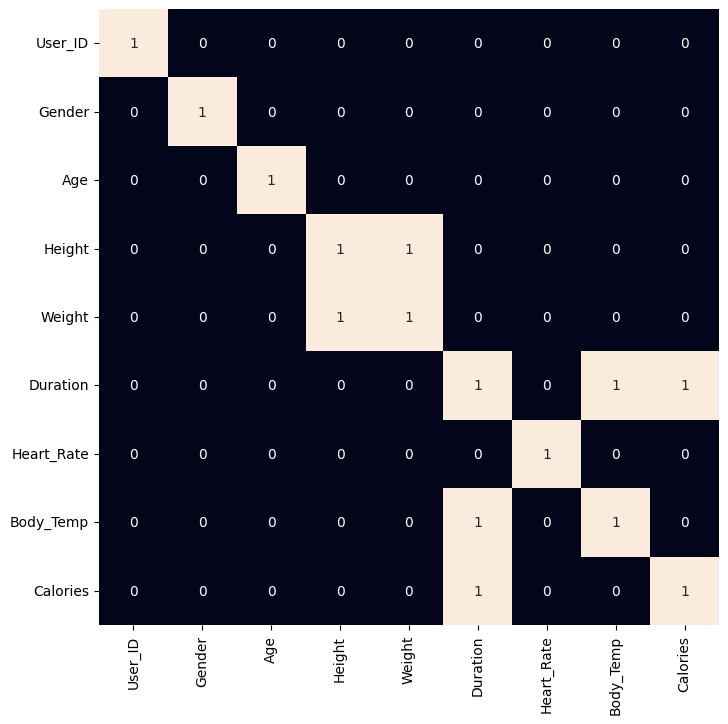

In [ ]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr() > 0.9,
		annot=True,
		cbar=False)
plt.show()


In [ ]:
#Due to high correlation, removing weight and duration
to_remove = ['Weight', 'Duration']
df.drop(to_remove, axis=1, inplace=True)


In [ ]:
#Dropping User ID because of no relation, calories is target
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

X_train, X_val,Y_train, Y_val = train_test_split(features, target,test_size=0.1,random_state=22)
X_train.shape, X_val.shape


((13500, 5), (1500, 5))

In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor()]

for i in range(3):
	models[i].fit(X_train, Y_train)

	print(f'{models[i]} : ')

	train_preds = models[i].predict(X_train)
	print('Training Error : ', mae(Y_train, train_preds))

	val_preds = models[i].predict(X_val)
	print('Validation Error : ', mae(Y_val, val_preds))
	print()


LinearRegression() : 
Training Error :  17.893463692619434
Validation Error :  18.007896272831253

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  7.89463304294701
Validation Error :  10.12050432946533

RandomForestRegressor() : 
Training Error :  3.990911793650794
Validation Err

MAKING PREDICTIONS BASED ON USER INPUT


In [ ]:
# Accept input from user
# Calculate mean of body temperature and heart rate directly from their respective datasets
mean_body_temp = df['Body_Temp'].mean()
mean_heart_rate = df['Heart_Rate'].mean()
gender = input("Enter your gender (male/female): ").lower()
age = int(input("Enter your age: "))
height = float(input("Enter your height (in cm): "))


# Create a DataFrame with the input data
input_data = pd.DataFrame({
    'Gender': [gender],
    'Age': [age],
    'Height': [height],

    'Heart_Rate':[mean_heart_rate],
    'Body_Temp':[mean_body_temp]
})

# Preprocess the input data
input_data.replace({'male': 0, 'female': 1}, inplace=True)

# Make predictions
input_data_scaled = scaler.transform(input_data)  # Scale the input data using the same scaler used during training

# Predict calories burnt using the best performing model
predicted_calories = models[2].predict(input_data_scaled)[0]

print("Predicted Calories Burnt:", predicted_calories)


Enter your gender (male/female): female
Enter your age: 20
Enter your height (in cm): 170
Predicted Calories Burnt: 68.43


ANALYSIS OF MODELS


Linear Regression:
Training Error: 17.893463692619434
Validation Error: 18.007896272831253

XGBoost:
Training Error: 7.89463304294701
Validation Error: 10.12050432946533

Random Forest:
Training Error: 3.9872385167548505
Validation Error: 10.542508047619048



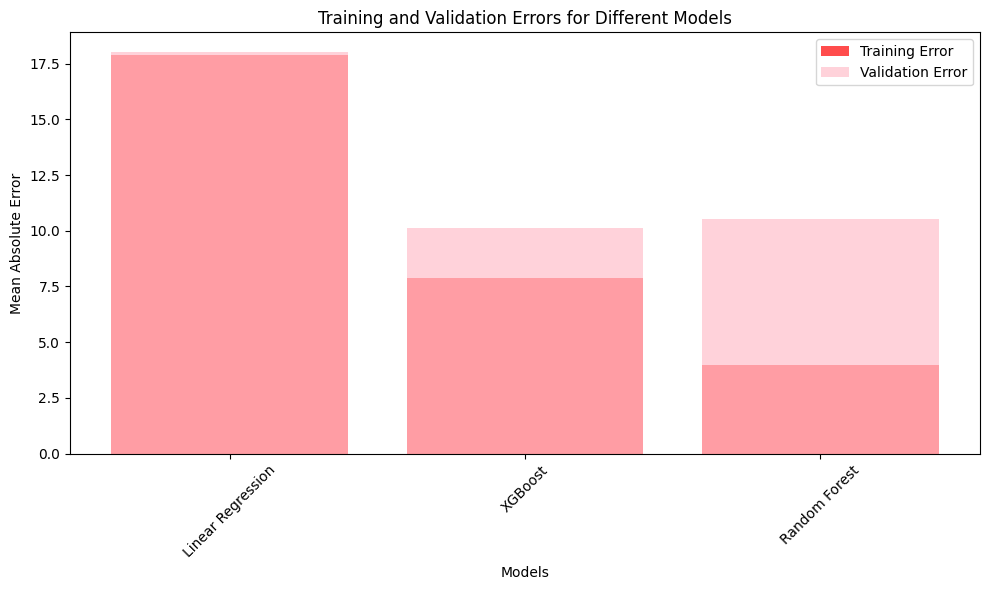

In [ ]:
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor()]
model_names = ['Linear Regression', 'XGBoost', 'Random Forest']

# Lists to store errors
train_errors = []
val_errors = []

# Train and evaluate models
for i, model in enumerate(models):
    model.fit(X_train, Y_train)

    train_preds = model.predict(X_train)
    train_error = mae(Y_train, train_preds)
    train_errors.append(train_error)

    val_preds = model.predict(X_val)
    val_error = mae(Y_val, val_preds)
    val_errors.append(val_error)

    print(f'{model_names[i]}:')
    print('Training Error:', train_error)
    print('Validation Error:', val_error)
    print()

# Plot errors
plt.figure(figsize=(10, 6))
plt.bar(model_names, train_errors, color='red', alpha=0.7, label='Training Error')
plt.bar(model_names, val_errors, color='pink', alpha=0.7, label='Validation Error')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation Errors for Different Models')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

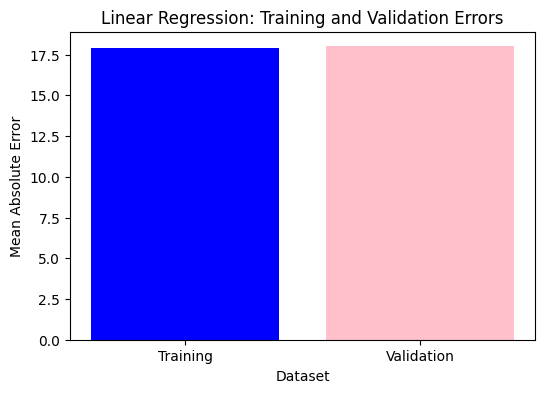

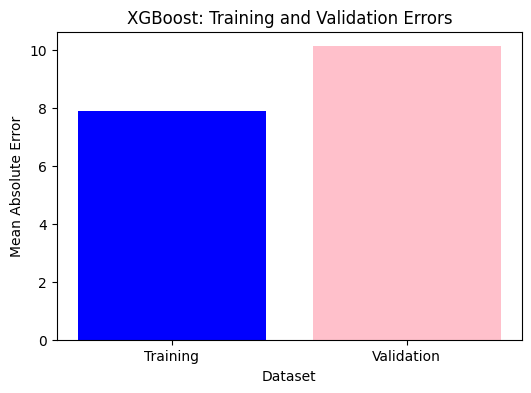

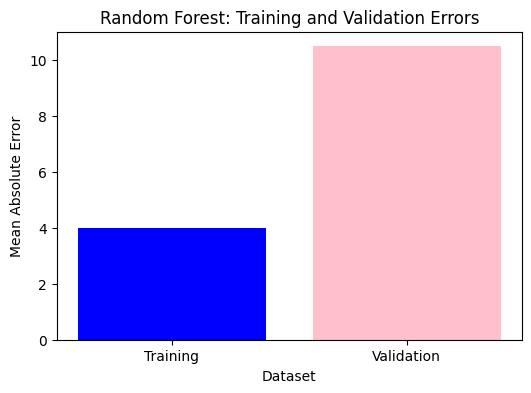

In [ ]:
import matplotlib.pyplot as plt

# Define models
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor()]
model_names = ['Linear Regression', 'XGBoost', 'Random Forest']

# Train and evaluate models
for i, model in enumerate(models):
    model.fit(X_train, Y_train)

    train_preds = model.predict(X_train)
    train_error = mae(Y_train, train_preds)

    val_preds = model.predict(X_val)
    val_error = mae(Y_val, val_preds)

    # Plot errors
    plt.figure(figsize=(6, 4))
    plt.bar(['Training', 'Validation'], [train_error, val_error], color=['blue', 'pink'])
    plt.xlabel('Dataset')
    plt.ylabel('Mean Absolute Error')
    plt.title(f'{model_names[i]}: Training and Validation Errors')
    plt.show()

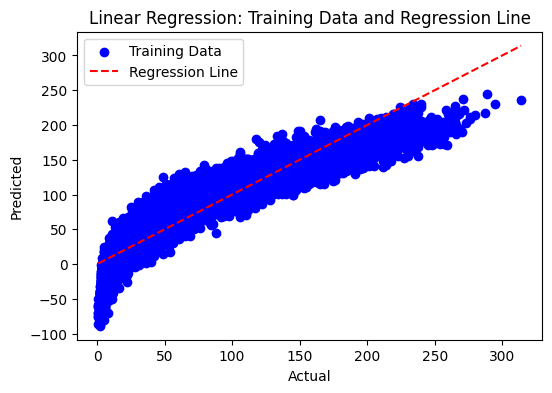

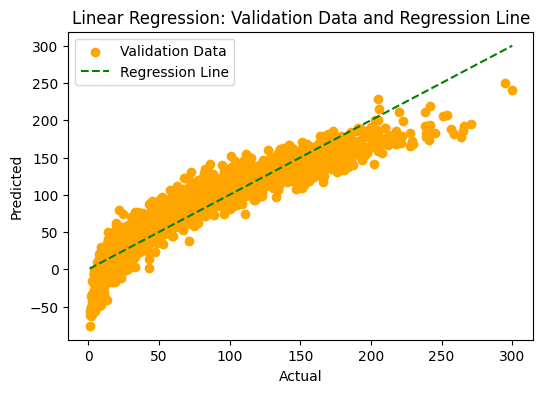

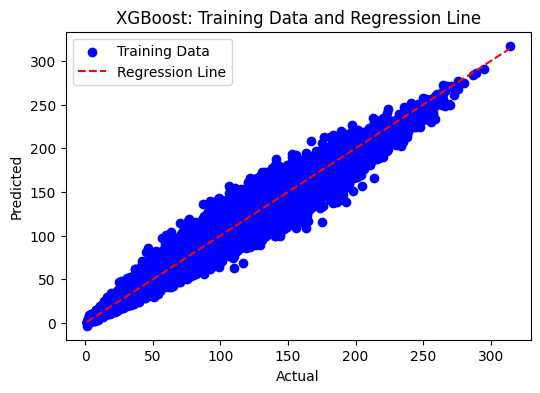

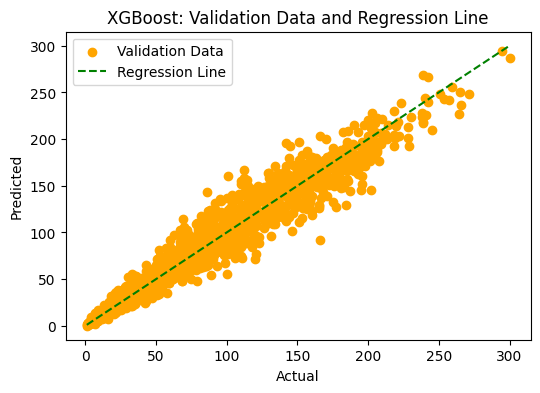

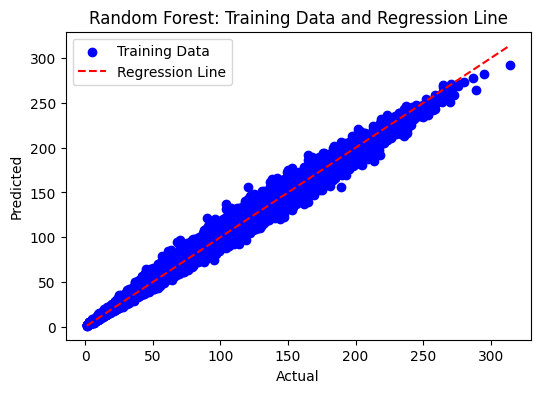

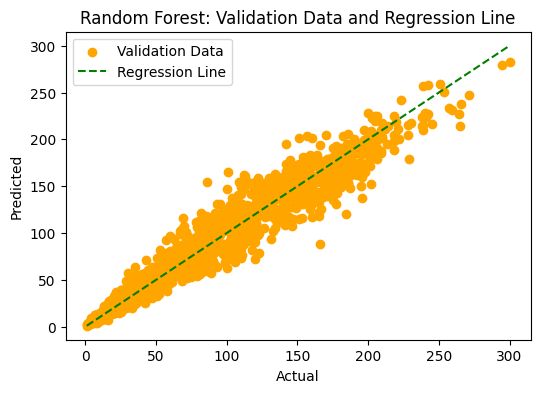

In [ ]:
# Define models
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor()]
model_names = ['Linear Regression', 'XGBoost', 'Random Forest']

# Train and evaluate models
for i, model in enumerate(models):
    model.fit(X_train, Y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Plot training data and regression line
    plt.figure(figsize=(6, 4))
    plt.scatter(Y_train, train_preds, color='blue', label='Training Data')
    plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linestyle='--', label='Regression Line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_names[i]}: Training Data and Regression Line')
    plt.legend()
    plt.show()

    # Plot validation data and regression line
    plt.figure(figsize=(6, 4))
    plt.scatter(Y_val, val_preds, color='orange', label='Validation Data')
    plt.plot([min(Y_val), max(Y_val)], [min(Y_val), max(Y_val)], color='green', linestyle='--', label='Regression Line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_names[i]}: Validation Data and Regression Line')
    plt.legend()
    plt.show()